In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data


import env
import acquire
import prepare

from sklearn.model_selection import train_test_split

In [2]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [66]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris["Sepal.Length"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal.Length, dtype: float64

In [8]:
df_iris["Sepal.Width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal.Width, dtype: float64

In [9]:
df_iris["Petal.Length"].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: Petal.Length, dtype: float64

In [10]:
df_iris["Petal.Width"].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal.Width, dtype: float64

In [15]:
df_excel = pd.read_csv("Table1_CustDetails.csv")

In [16]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [17]:
df_excel_sample = pd.read_clipboard()

In [19]:
df_excel_sample.shape

(99, 12)

In [21]:
df_excel.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [22]:
df_excel.iloc[: , :5]

,customer_id,gender,is_senior_citizen,partner,dependents
0,0002-ORFBO,Female,0,Yes,Yes
1,0003-MKNFE,Male,0,No,No
2,0004-TLHLJ,Male,0,No,No
3,0011-IGKFF,Male,1,Yes,No
4,0013-EXCHZ,Female,1,Yes,No
...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No
7045,9992-RRAMN,Male,0,Yes,No
7046,9992-UJOEL,Male,0,No,No
7047,9993-LHIEB,Male,0,Yes,Yes


In [23]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [26]:
df_excel.select_dtypes(include ='object')

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [27]:
df_excel.select_dtypes(include =('int64', 'float64'))

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
0,0,1,1,1,65.60,593.30
1,0,2,1,0,59.90,542.40
2,0,1,2,0,73.90,280.85
3,1,1,2,0,98.00,1237.85
4,1,1,2,0,83.90,267.40
...,...,...,...,...,...,...
7044,0,1,1,1,55.15,742.90
7045,0,2,2,0,85.10,1873.70
7046,0,1,1,0,50.30,92.75
7047,0,1,1,2,67.85,4627.65


In [30]:
df_excel.monthly_charges.max() - df_excel.monthly_charges.min()

100.5

In [31]:
df_excel.total_charges.max() - df_excel.total_charges.min()

8666.0

In [36]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

In [38]:
df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [39]:
df_google.shape

(891, 12)

In [40]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
df_google['Sex'].value_counts().dropna()

male      577
female    314
Name: Sex, dtype: int64

In [70]:
df_google['Pclass'].value_counts().dropna()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [68]:
df_google['Embarked'].value_counts().dropna()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [53]:
import env
import pandas as pd
import os

# Get titanic .csv Data
def get_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile(filename):
        titanic = pd.read_csv(filename)
    else:
        titanic = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))
        titanic.to_csv(index = False)
    return titanic

In [54]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [55]:
def get_iris_data():
    filename = "iris.csv"

    if os.path.isfile(filename):
        iris = pd.read_csv(filename)
    else:
        iris = pd.read_sql('SELECT * FROM species JOIN measurements using(species_id)', get_connection('iris_db'))
        iris.to_csv(index = False)
    return iris

In [56]:
get_iris_data()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2
5,1,setosa,6,5.4,3.9,1.7,0.4
6,1,setosa,7,4.6,3.4,1.4,0.3
7,1,setosa,8,5.0,3.4,1.5,0.2
8,1,setosa,9,4.4,2.9,1.4,0.2
9,1,setosa,10,4.9,3.1,1.5,0.1


# Data Prep Exercises 

# Part 1 With Iris Data

In [11]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [4]:
def prep_iris(df):
    '''
    This function will clean the data
    '''
    #df = df.drop_duplicates()
    
    # Commented out measurement_id cause it was in the cols_to_drop list
    cols_to_drop = ['species_id'] #'measurement_id'
    df = df.drop(columns = cols_to_drop)
    
    
    df = df.rename(columns={'species_name': 'species'})
    #df['embark_town'] = df.embark_town.fillna(value = 'Southampton')
    
    #dummy_df = pd.get_dummies(df[['species']], dummy_na = False, drop_first = [True, True])
    # Changed iris_df to iris_copy for evaluation anaylsis exercises
    dummy_df = pd.get_dummies(iris_copy[['species_id']], dummy_na = False, drop_first = True)
    

    
    df = pd.concat([df, dummy_df], axis = 1)
    
    return df

In [13]:
iris_df = prep_iris(iris_df)
iris_df.head(20)

,species,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,5.1,3.5,1.4,0.2,1
1,setosa,4.9,3.0,1.4,0.2,1
2,setosa,4.7,3.2,1.3,0.2,1
3,setosa,4.6,3.1,1.5,0.2,1
4,setosa,5.0,3.6,1.4,0.2,1
5,setosa,5.4,3.9,1.7,0.4,1
6,setosa,4.6,3.4,1.4,0.3,1
7,setosa,5.0,3.4,1.5,0.2,1
8,setosa,4.4,2.9,1.4,0.2,1
9,setosa,4.9,3.1,1.5,0.1,1


# Part 2 With Titanic Data

In [48]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [49]:
titanic_df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [50]:
def prep_titanic(df):
    '''
    This function will clean the data
    '''
    df = df.drop_duplicates()
    #df = df.isnull().dropna()
    
    
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    df = df.drop(columns = cols_to_drop)
    
    df['embark_town'] = df.embark_town.fillna(value = 'Southampton')
  
    dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na = False, drop_first = [True, True])

    df = pd.concat([df, dummy_df], axis = 1)
    
    return df

In [51]:
titanic_df = prep_titanic(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


# Part 3 With Telco

In [56]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [34]:
telco_df.head(10)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)
5,3,1,3,0114-IGABW,Female,0,Yes,No,71,No,...,Yes,Yes,Yes,No,58.25,4145.90,No,Two year,DSL,Bank transfer (automatic)
6,2,1,3,0123-CRBRT,Female,0,Yes,Yes,61,Yes,...,Yes,Yes,Yes,No,88.10,5526.75,No,Two year,DSL,Mailed check
7,3,1,3,0191-EQUUH,Female,0,No,Yes,25,No,...,Yes,No,No,No,35.05,844.45,No,Two year,DSL,Bank transfer (automatic)
8,3,1,3,0214-JHPFW,Female,0,Yes,No,70,No,...,Yes,Yes,Yes,No,57.80,4039.30,No,Two year,DSL,Bank transfer (automatic)
9,3,1,3,0229-LFJAF,Male,0,No,No,72,Yes,...,Yes,No,No,No,69.65,4908.25,No,Two year,DSL,Bank transfer (automatic)


In [33]:
telco_df = telco_df.drop_duplicates()

In [35]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [36]:
telco_df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [53]:
telco_df['total_charges'] = telco_df.total_charges.replace(' ', 0)

In [54]:
telco_df['total_charges'] = telco_df.total_charges.astype('float64')

In [55]:
telco_df.total_charges.isna().sum()

0

In [57]:
def prep_telco(df):
    '''
    This function will clean the data
    '''
    df = df.drop_duplicates()
    
    cols_to_drop = ['tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'payment_type_id',
                   'internet_service_type_id', 'contract_type_id', 'online_security', 'online_backup',
                   'device_protection']
    df = df.drop(columns = cols_to_drop)
    
  
    telco_df['total_charges'] = telco_df.total_charges.replace(' ', 0)
    telco_df['total_charges'] = telco_df.total_charges.astype('float64')

    dummy_df = pd.get_dummies(df[['gender','senior_citizen', 'partner', 'dependents',
                                 'churn']], dummy_na = False, drop_first = [True])

    df = pd.concat([df, dummy_df], axis = 1)
    
    return df

In [58]:
telco_df = prep_telco(telco_df)
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,senior_citizen,gender_Male,partner_Yes,dependents_Yes,churn_Yes
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check,0,0,1,1,0
1,0017-DINOC,Male,0,No,No,54,No,No phone service,45.20,2460.55,No,Two year,DSL,Credit card (automatic),0,1,0,0,0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic),0,0,0,0,0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,39.40,825.4,No,Two year,DSL,Credit card (automatic),0,1,1,1,0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic),0,1,1,0,0


# ----------------------------------------------
# ----------------------------------------------
# Evaluation Analysis Exercises 1-3

# Exercise 1: 

In [2]:
# create dataframe of iris df, create copy to change and implement
raw_data = acquire.get_iris_data()
iris_copy = raw_data.copy()
iris_copy.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [5]:
# Clean Data Using prep_iris function

iris_copy = prep_iris(iris_copy)

In [68]:
iris_copy.head()

,species,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,setosa,1,5.1,3.5,1.4,0.2,1
1,setosa,2,4.9,3.0,1.4,0.2,1
2,setosa,3,4.7,3.2,1.3,0.2,1
3,setosa,4,4.6,3.1,1.5,0.2,1
4,setosa,5,5.0,3.6,1.4,0.2,1


In [6]:
# Split the data function
def train_validate_test_split(df, target):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes)
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .25*.90= 22.5% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2,  
                                            stratify=df[target])
    
    
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       stratify=train_validate[target])
    return train, validate, test

In [70]:
#Splitting the data here
train, validate, test = train_validate_test_split(iris_copy, target='species_id')

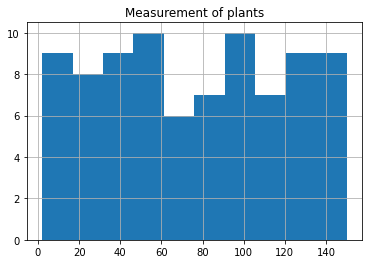

In [9]:
plt.title("Measurement of plants")
train.measurement_id.hist()
plt.show()

In [14]:
train.columns

Index(['species', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_id'],
      dtype='object')

array([[<AxesSubplot:title={'center':'measurement_id'}>,
        <AxesSubplot:title={'center':'sepal_length'}>],
       [<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'species_id'}>]], dtype=object)

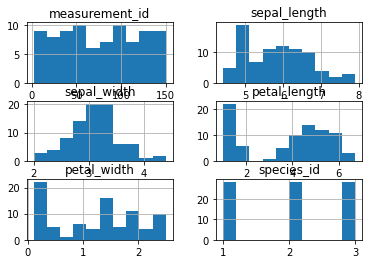

In [19]:
train.hist()

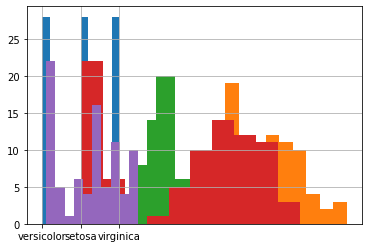

In [21]:
# Create a loop to iterate and create histo plots for variables
for i in train.drop(columns = ['species_id', 'measurement_id']):
    train[i].hist()

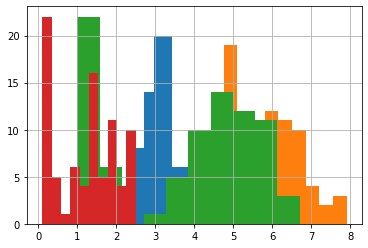

In [25]:
for i in train[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']]:
    train[i].hist()

### Part 1-1

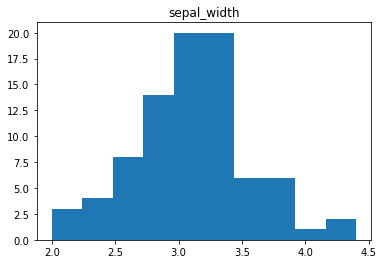

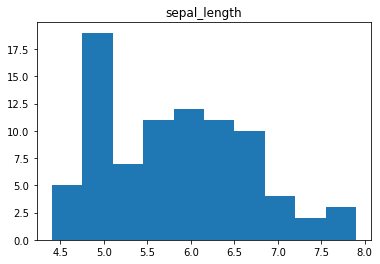

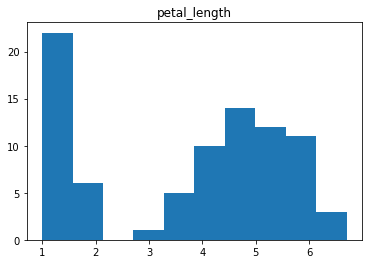

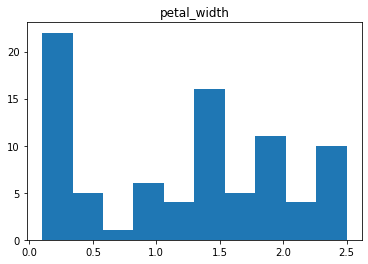

In [27]:
for i in train[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']]:
    plt.figure()
    plt.title(i)
    plt.hist(train[i])

### Part 2-1

Text(0.5, 1.0, 'test1')

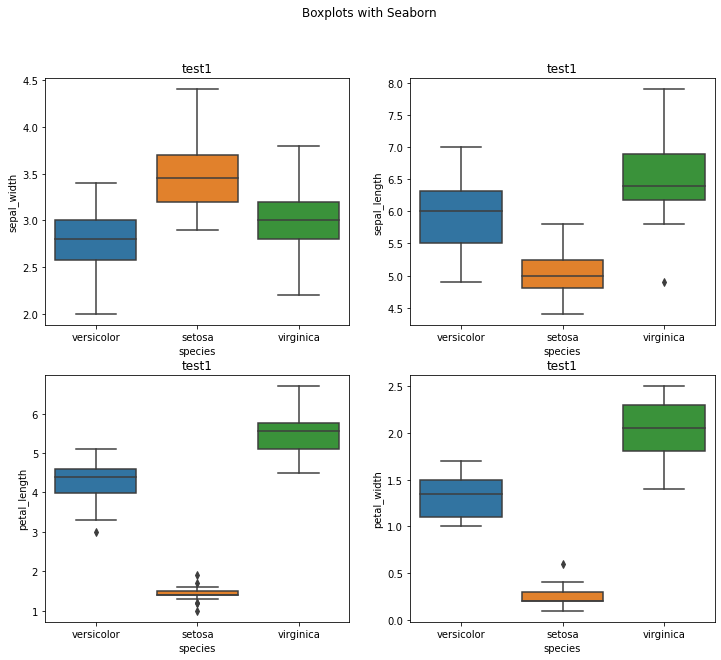

In [62]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=train, y='sepal_width', x='species')
plt.title('test1')

plt.subplot(222)
sns.boxplot(data=train, y='sepal_length', x='species')
plt.title('test1')

plt.subplot(223)
sns.boxplot(data=train, y='petal_length', x='species')
plt.title('test1')

plt.subplot(224)
sns.boxplot(data=train, y='petal_width', x='species')
plt.title('test1')

### Part 3-1

In [47]:
for i in train[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']]:
    print(train[i].describe())
    print('-----------------')
    print('-----------------')

count    84.000000
mean      3.091667
std       0.449151
min       2.000000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64
-----------------
-----------------
count    84.000000
mean      5.830952
std       0.831021
min       4.400000
25%       5.100000
50%       5.850000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
-----------------
-----------------
count    84.000000
mean      3.728571
std       1.764617
min       1.000000
25%       1.500000
50%       4.400000
75%       5.100000
max       6.700000
Name: petal_length, dtype: float64
-----------------
-----------------
count    84.000000
mean      1.201190
std       0.771088
min       0.100000
25%       0.300000
50%       1.350000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
-----------------
-----------------


### Takeaways

Sepal width/length look like a normal bell curve where petal length/ width seem to have a non standard bell curve.
Setosa seems to have a low petal length/ width than the others, where its a little harder to decipher between
virginica and versicolor.

## Bivariate Stats

In [66]:
### Part 1-2

Text(0.5, 1.0, 'Petal_Width')

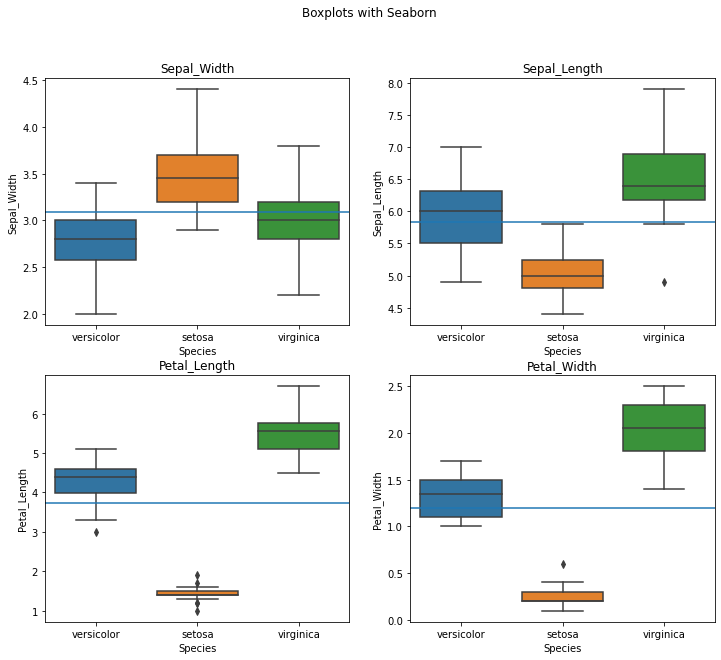

In [65]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=train, y='sepal_width', x='species')
plt.axhline(train.sepal_width.mean())
plt.xlabel('Species')
plt.ylabel('Sepal_Width')
plt.title('Sepal_Width')

plt.subplot(222)
sns.boxplot(data=train, y='sepal_length', x='species')
plt.axhline(train.sepal_length.mean())
plt.xlabel('Species')
plt.ylabel('Sepal_Length')
plt.title('Sepal_Length')

plt.subplot(223)
sns.boxplot(data=train, y='petal_length', x='species')
plt.axhline(train.petal_length.mean())
plt.xlabel('Species')
plt.ylabel('Petal_Length')
plt.title('Petal_Length')

plt.subplot(224)
sns.boxplot(data=train, y='petal_width', x='species')
plt.axhline(train.petal_width.mean())
plt.xlabel('Species')
plt.ylabel('Petal_Width')
plt.title('Petal_Width')

Text(0.5, 1.0, 'Petal_Width')

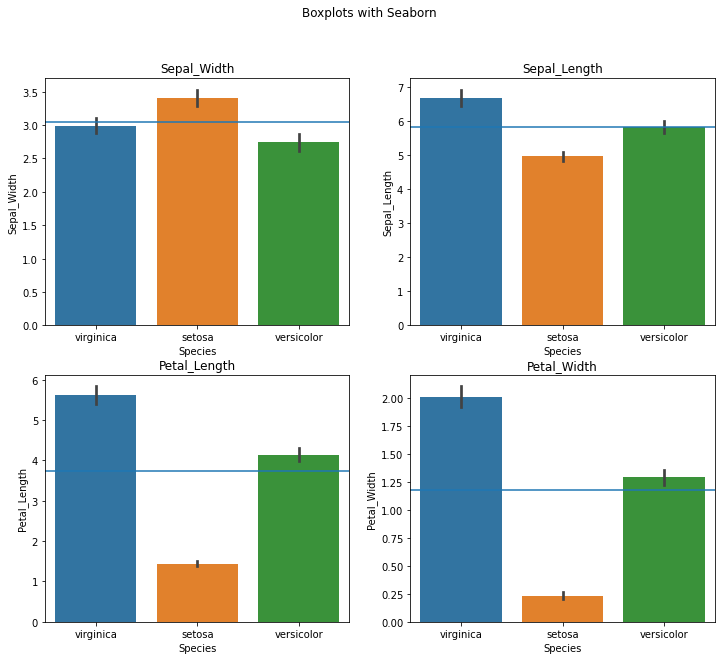

In [71]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.barplot(data=train, y='sepal_width', x='species')
plt.axhline(train.sepal_width.mean())
plt.xlabel('Species')
plt.ylabel('Sepal_Width')
plt.title('Sepal_Width')

plt.subplot(222)
sns.barplot(data=train, y='sepal_length', x='species')
plt.axhline(train.sepal_length.mean())
plt.xlabel('Species')
plt.ylabel('Sepal_Length')
plt.title('Sepal_Length')

plt.subplot(223)
sns.barplot(data=train, y='petal_length', x='species')
plt.axhline(train.petal_length.mean())
plt.xlabel('Species')
plt.ylabel('Petal_Length')
plt.title('Petal_Length')

plt.subplot(224)
sns.barplot(data=train, y='petal_width', x='species')
plt.axhline(train.petal_width.mean())
plt.xlabel('Species')
plt.ylabel('Petal_Width')
plt.title('Petal_Width')

### Part 2-2

In [68]:
for i in train[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']]:
    print(train[i].describe())
    print('-----------------')
    print('-----------------')

count    84.000000
mean      3.091667
std       0.449151
min       2.000000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64
-----------------
-----------------
count    84.000000
mean      5.830952
std       0.831021
min       4.400000
25%       5.100000
50%       5.850000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
-----------------
-----------------
count    84.000000
mean      3.728571
std       1.764617
min       1.000000
25%       1.500000
50%       4.400000
75%       5.100000
max       6.700000
Name: petal_length, dtype: float64
-----------------
-----------------
count    84.000000
mean      1.201190
std       0.771088
min       0.100000
25%       0.300000
50%       1.350000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
-----------------
-----------------


### Part 3-2

In [73]:
virginica = train[train.species == 'virginica']
setosa = train[train.species == 'setosa']
versicolor = train[train.species == 'versicolor']

In [83]:
for i in train[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']]:
    t, p = stats.mannwhitneyu(virginica[i], versicolor[i])
    
    
    null_hypothesis = 'no difference between ' + i + ' in virginica and versicolor'
    alternative_hypothesis = 'there is a difference between ' + i + ' in virginica and versicolor'

    alpha = 0.05
    print('This is the t:', t, '\nThis is the p-value: ', p)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,')
    
    if p < alpha:
        print("We reject the null hypothesis that ", null_hypothesis)
        print("Evidence suggests that ", alternative_hypothesis)
    else:
        print("We fail to reject the null hypothesis ")
        print("We find insufficient evidence to support the claim that ", alternative_hypothesis)
    print('-------------------------------------')
    print('-------------------------------------')
    print('-------------------------------------')
    

This is the t: 248.5 
This is the p-value:  0.009199210674269504
,,,,,,,,,,,,,,,,,,,,,,,,,,
We reject the null hypothesis that  no difference between sepal_width in virginica and versicolor
Evidence suggests that  there is a difference between sepal_width in virginica and versicolor
-------------------------------------
-------------------------------------
-------------------------------------
This is the t: 104.0 
This is the p-value:  1.1866606787035914e-06
,,,,,,,,,,,,,,,,,,,,,,,,,,
We reject the null hypothesis that  no difference between sepal_length in virginica and versicolor
Evidence suggests that  there is a difference between sepal_length in virginica and versicolor
-------------------------------------
-------------------------------------
-------------------------------------
This is the t: 9.5 
This is the p-value:  1.8371237081489658e-10
,,,,,,,,,,,,,,,,,,,,,,,,,,
We reject the null hypothesis that  no difference between petal_length in virginica and versicolor
Evidence 

### Takeaways:

Petal length/width plays a big role in comparing virginica and versicolor. And other statements stated in the previous
takeaways section.

## Multivariate Stats

### Part 3-1

<Figure size 1440x1080 with 0 Axes>

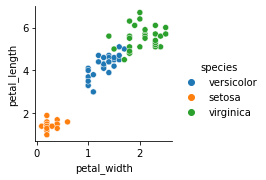

In [78]:
plt.figure(figsize = (20, 15))
sns.pairplot(x_vars='petal_width', y_vars= 'petal_length', data = train, hue = 'species')

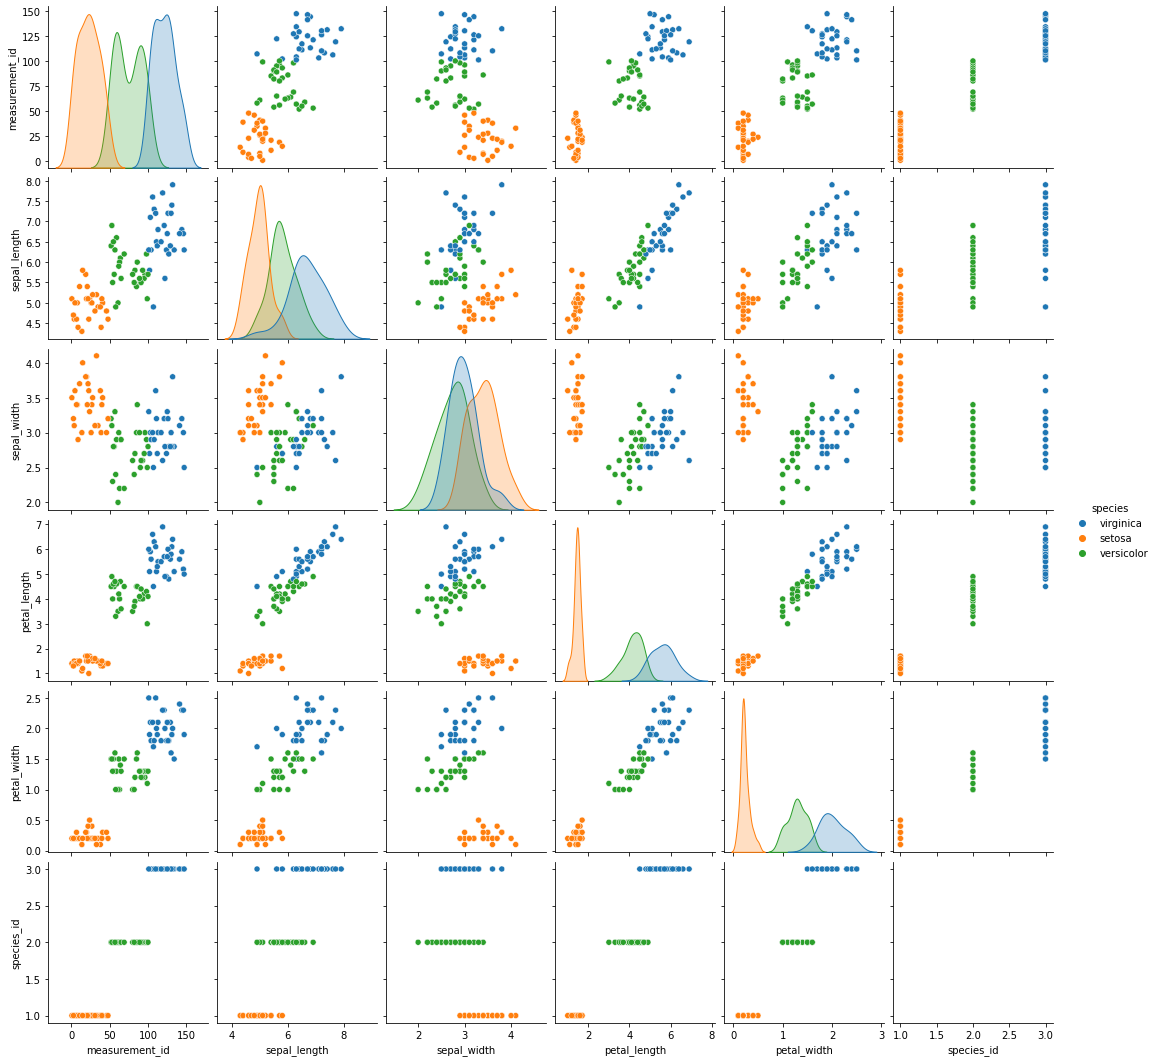

In [81]:
sns.pairplot(train, hue = 'species')
plt.show()

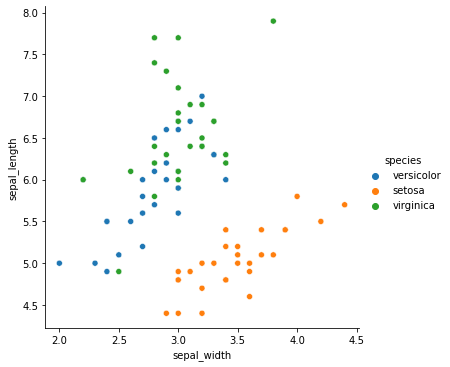

In [74]:
sns.relplot(x='sepal_width', y='sepal_length', data=train, hue="species")

In [122]:
iris_copy.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [131]:
# Finish after tidy data to understand how to melt data
#iris_melted = train.drop(columns=[train[train.species == 'versicolor'], train[train.species == 'virginica']]).melt(id_vars='species')
#iris_melted
#plt.figure(figsize = (10, 8))
#sns.swarmplot(x='variable', y='value', data=iris_metled, hue = 'species')

# Exploration Analysis Exercsise Part 2 (Titanic Data)

In [8]:
raw_data2 = acquire.get_titanic_data()
tit_copy = raw_data2.copy()
tit_copy.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [84]:
tit_copy.shape

(891, 13)

In [9]:
def prep_titanic(df):
    '''
    take in titanc dataframe, remove all rows where age or embarked is null, 
    get dummy variables for sex and embark_town, 
    and drop sex, deck, passenger_id, class, and embark_town. 
    '''

    df = df[(df.age.notna()) & (df.embarked.notna())]
    df = df.drop(columns=['deck', 'passenger_id', 'class'])

    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], prefix=['sex', 'embark'])

    df = pd.concat([df, dummy_df.drop(columns=['sex_male'])], axis=1)

    df = df.drop(columns=['sex', 'embark_town']) 

    df = df.rename(columns={"sex_female": "is_female"})

    return df

In [10]:
tit_copy = prep_titanic(tit_copy)

In [11]:
def train_validate_test_split(df, target):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes)
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .25*.90= 22.5% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2,  
                                            stratify=df[target])
    
    
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       stratify=train_validate[target])
    return train, validate, test

In [40]:
train, validate, test = train_validate_test_split(tit_copy, target='survived')

In [99]:
train.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'alone', 'is_female', 'embark_Cherbourg', 'embark_Queenstown',
       'embark_Southampton'],
      dtype='object')

In [100]:
train.describe()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.404523,2.248744,29.568266,0.537688,0.449749,35.876371,0.560302,0.369347,0.168342,0.052764,0.778894
std,0.491417,0.846350,14.883011,0.956134,0.881513,57.241295,0.496975,0.483235,0.374640,0.223843,0.415514
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.645850,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,34.156250,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,74.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 318 to 516
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            398 non-null    int64  
 1   pclass              398 non-null    int64  
 2   age                 398 non-null    float64
 3   sibsp               398 non-null    int64  
 4   parch               398 non-null    int64  
 5   fare                398 non-null    float64
 6   embarked            398 non-null    object 
 7   alone               398 non-null    int64  
 8   is_female           398 non-null    uint8  
 9   embark_Cherbourg    398 non-null    uint8  
 10  embark_Queenstown   398 non-null    uint8  
 11  embark_Southampton  398 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(4)
memory usage: 29.5+ KB


In [102]:
train.value_counts()

survived  pclass  age   sibsp  parch  fare     embarked  alone  is_female  embark_Cherbourg  embark_Queenstown  embark_Southampton
0         3       17.0  0      0      8.6625   S         1      0          0                 0                  1                     3
                  19.0  0      0      7.8958   S         1      0          0                 0                  1                     3
          2       34.0  1      0      21.0000  S         0      0          0                 0                  1                     2
1         2       28.0  0      0      13.0000  S         1      1          0                 0                  1                     2
0         2       25.0  0      0      13.0000  S         1      0          0                 0                  1                     2
                                                                                                                                     ..
          3       21.0  0      0      7.7500   Q     

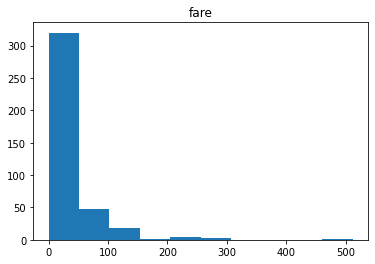

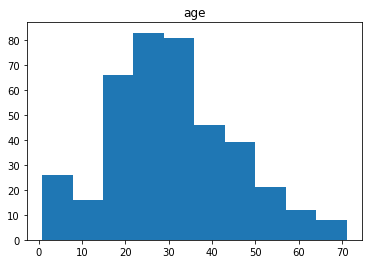

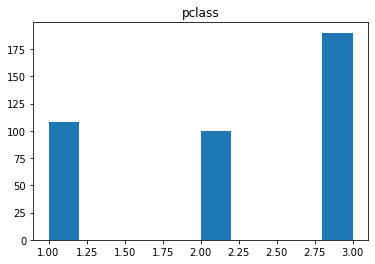

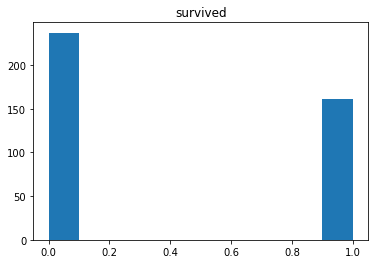

In [130]:
for i in train[['fare', 'age', 'pclass', 'survived']]:
    plt.figure()
    plt.title(i)
    plt.hist(train[i])

Text(0.5, 1.0, 'is_female')

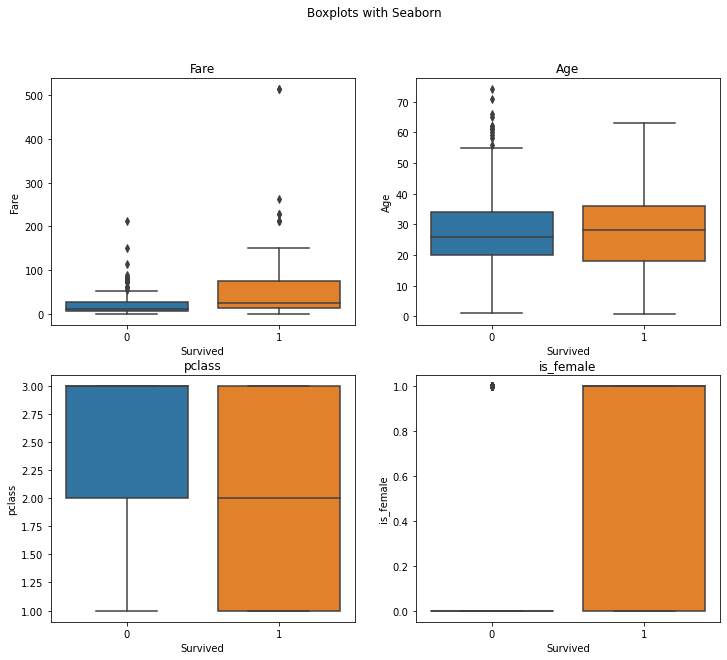

In [20]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=train, y='fare', x='survived')
#plt.axhline(train.sepal_width.mean())
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare')

plt.subplot(222)
sns.boxplot(data=train, y='age', x='survived')
#plt.axhline(train.sepal_length.mean())
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age')

plt.subplot(223)
sns.boxplot(data=train, y='pclass', x='survived')
#plt.axhline(train.petal_length.mean())
plt.xlabel('Survived')
plt.ylabel('pclass')
plt.title('pclass')

plt.subplot(224)
sns.boxplot(data=train, y='is_female', x='survived')
#plt.axhline(train.petal_length.mean())
plt.xlabel('Survived')
plt.ylabel('is_female')
plt.title('is_female')

<AxesSubplot:xlabel='alone', ylabel='survived'>

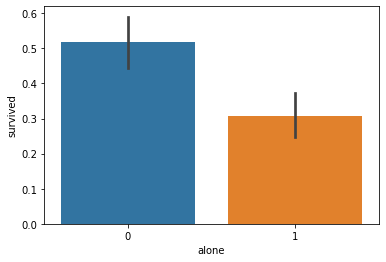

In [21]:
sns.barplot(x = 'alone', y = 'survived', data = train)

<AxesSubplot:xlabel='sibsp', ylabel='survived'>

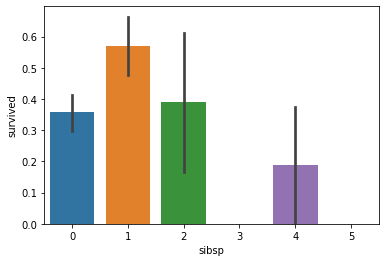

In [31]:
sns.barplot(x = 'sibsp', y = 'survived', data = train)

In [25]:
for i in train[['age', 'fare']]:
    print(train[i].describe())
    print('-----------------')
    print('-----------------')

count    398.000000
mean      27.841709
std       14.199538
min        0.750000
25%       19.000000
50%       27.000000
75%       36.000000
max       74.000000
Name: age, dtype: float64
-----------------
-----------------
count    398.000000
mean      33.570382
std       51.592393
min        0.000000
25%        8.034400
50%       15.145800
75%       34.286450
max      512.329200
Name: fare, dtype: float64
-----------------
-----------------


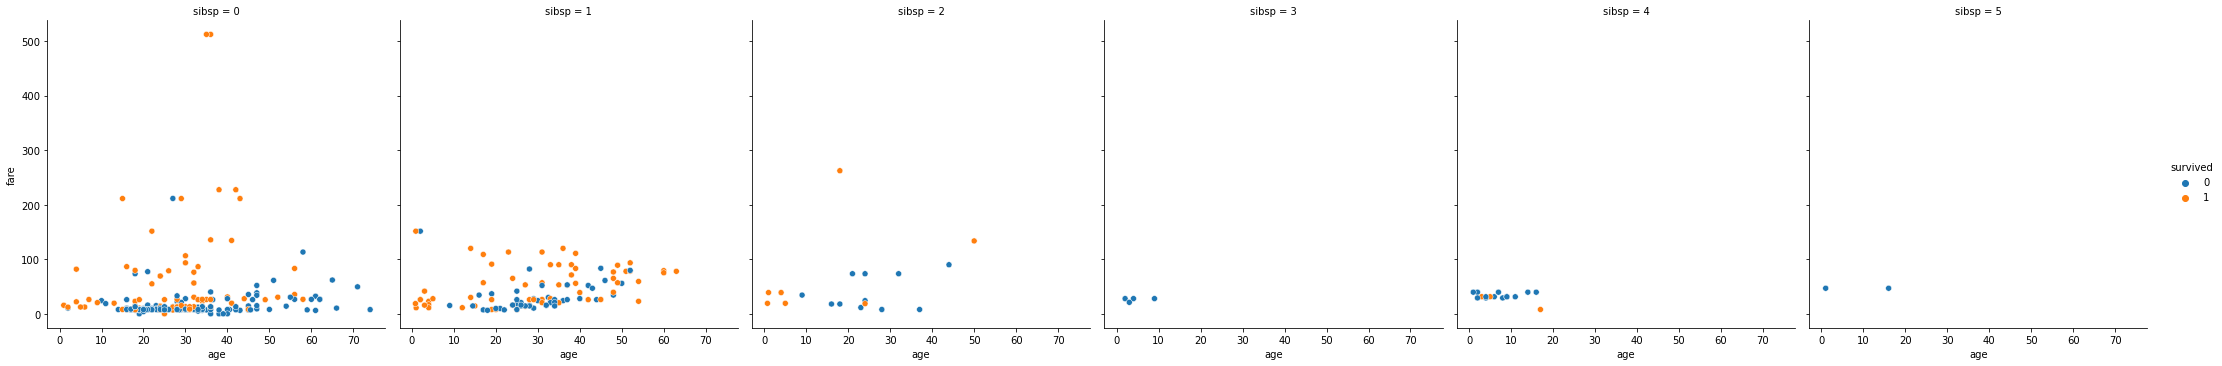

In [27]:
sns.relplot(x='age', y='fare', data=train, col="sibsp", hue="survived")


<AxesSubplot:xlabel='pclass', ylabel='age'>

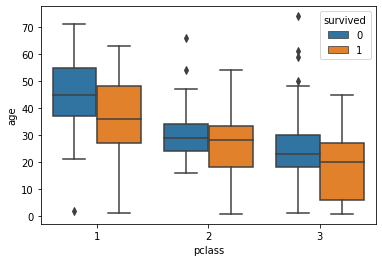

In [29]:
sns.boxplot(x="pclass", y="age", data=train, hue="survived")

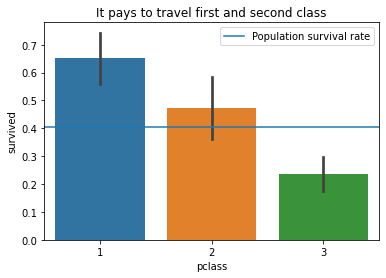

In [41]:
plt.title("It pays to travel first and second class")
sns.barplot(x="pclass", y="survived", data=train)
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

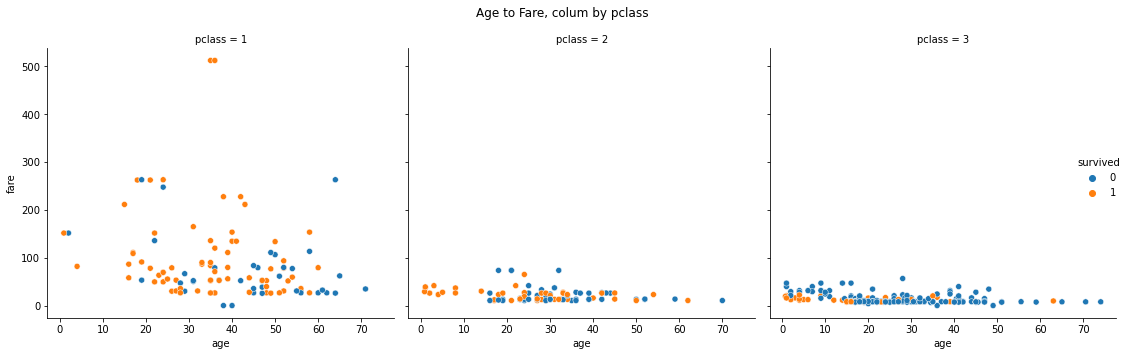

In [44]:
rel = sns.relplot(x='age', y='fare', data=train, col="pclass", hue="survived")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
plt.tight_layout()

In [42]:
not_survived = train[train.survived == 0]
survived = train[train.survived == 1]

In [43]:
test = stats.mannwhitneyu(survived.fare, not_survived.fare)
print(test)

MannwhitneyuResult(statistic=12264.0, pvalue=7.212092117085073e-10)


In [45]:
male_subset = train[train.is_female == 0]
female_subset = train[train.is_female == 1]

In [46]:
test2 = stats.mannwhitneyu(male_subset.survived, female_subset.survived)
print(test2)

MannwhitneyuResult(statistic=8012.0, pvalue=9.313585802472926e-27)


In [61]:
age_labels = ['younger','middle', 'old']
#age_numbers = [0,25,75, 100]
cool = pd.cut(train['age'], bins= 3, labels = age_labels)
cool

197     middle
160     middle
536     middle
812     middle
731    younger
        ...   
321     middle
594     middle
631        old
96         old
337     middle
Name: age, Length: 398, dtype: category
Categories (3, object): ['younger' < 'middle' < 'old']

<AxesSubplot:>

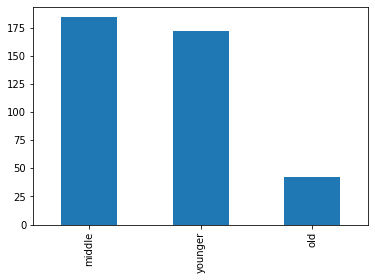

In [63]:
cool.value_counts().plot.bar()

In [64]:
train['Age_Groups'] = cool

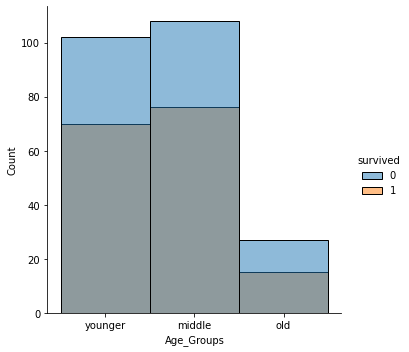

In [65]:
sns.displot(x = 'Age_Groups', data = train, hue = 'survived')

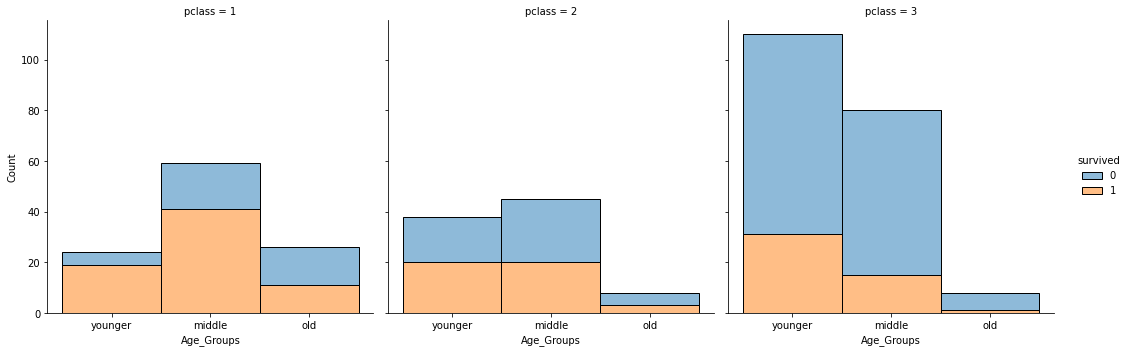

In [68]:
sns.displot(x = 'Age_Groups', data = train,col = 'pclass', hue = 'survived', alpha = 0.5, multiple = 'stack')

Take aways:
    
    Surivival Rate is highers depending on class
    Women survived more than men.
    If you were'nt alone/ had siblings your chances of survivability where higher
    Those that payed higher fares tended to survive more
    Pclass 1 children are more likely to survive rather than pclass 3 children

# Exploration Analysis Exercsise Part 3 (Teleco Data)

In [32]:
raw_data3 = acquire.get_telco_data()
tele_copy = raw_data3.copy()
tele_copy.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [118]:
tele_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [33]:
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = train_validate_test_split(df, target='churn')
    
    return train, validate, test

In [34]:
train, validate, test = prep_telco_data(tele_copy)
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3388,Female,0,No,No,7,Yes,No,No,Yes,No,...,1,0,1,1,0,1,0,0,0,1
2228,Male,0,No,No,1,Yes,No,Yes,No,No,...,0,0,0,0,0,0,0,0,1,0
4177,Female,1,No,No,52,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,0,1,0,1,0,0
3128,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
6782,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,0


In [35]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 3388 to 6901
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

In [39]:
train.shape

(3937, 47)

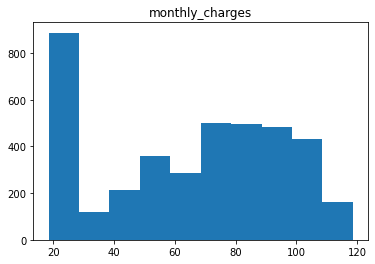

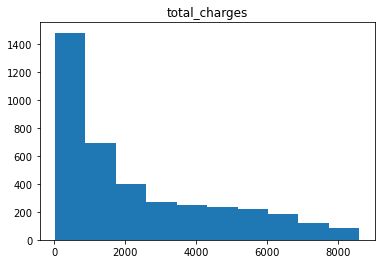

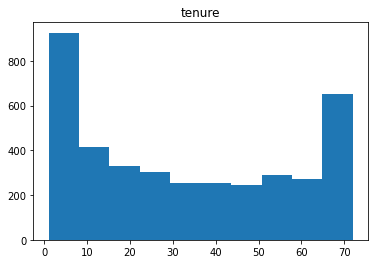

In [38]:
for i in train[['monthly_charges', 'total_charges', 'tenure']]:
    plt.figure()
    plt.title(i)
    plt.hist(train[i])